# Clark Residual Plots

In [2]:
import chainladder as cl

This example demonstrates how to recreate the normalized residual plots in
Clarks LDF Curve-Fitting paper (2003).


In [6]:
# Fit the basic model
genins = cl.load_sample('genins')
genins = cl.ClarkLDF().fit(genins)

# Grab Normalized Residuals as a DataFrame
norm_resid = genins.norm_resid_.melt(
    var_name='Development Age',
    value_name='Normalized Residual').dropna()

# Grab Fitted Incremental values as a DataFrame
incremental_fits = genins.incremental_fits_.melt(
    var_name='Development Age',
    value_name='Expected Incremental Loss').dropna()
incremental_fits = incremental_fits.merge(
    norm_resid, how='inner', left_index=True, right_index=True)


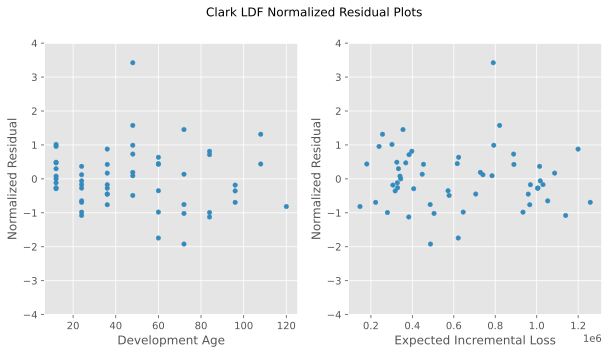

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the residuals vs Age and vs Expected Incrementals
fig, ((ax0, ax1)) = plt.subplots(ncols=2, figsize=(10,5))

# Left plot
norm_resid.plot(
    x='Development Age', y='Normalized Residual',
    kind='scatter', grid=True, ylim=(-4, 4), ax=ax0)
# Right plot
incremental_fits.plot(
    x='Expected Incremental Loss', y='Normalized Residual',
    kind='scatter', grid=True, ylim=(-4, 4), ax=ax1)
fig.suptitle("Clark LDF Normalized Residual Plots");

In [ ]:
from myst_nb import glue
glue("plot_clarkldf_resid", fig, display=False)